In [2]:
#set up
%matplotlib inline

import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
import seaborn as sns
import ast
plt.style.use('seaborn-darkgrid')
sns.set_style("darkgrid")

C:\Users\jesse\AppData\Local\Temp\ipykernel_22876\1802404010.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


In [3]:
#read in files
artists = pd.read_csv('artists.csv')
final_playlists = pd.read_csv('final_playlists.csv')
final_tracks = pd.read_csv('final_tracks.csv')
main_dataset = pd.read_csv('main_dataset.csv')

In [4]:
main_dataset

,track_uri,name,artists_names,popularity,album_type,is_playable,release_date,artists_uris,playlist_uris,danceability,...,instrumentalness,liveness,valence,tempo,analysis_url,duration_ms,time_signature,artists_popularities,artists_genres,artists_followers
0,spotify:track:3v6sBj3swihU8pXQQHhDZo,Way Up (feat. Ava Re),['Floduxe'],0,single,True,2015-11-20,['spotify:artist:4B7SI5PsnEgeMQd6gSIrbn'],['spotify:playlist:5JJZvA3VR9RZ5XIr0reWiM'],0.611,...,0.000794,0.7530,0.520,128.050,https://api.spotify.com/v1/audio-analysis/3v6s...,195000.0,4.0,[9],[[]],[765]
1,spotify:track:7KCWmFdw0TzoJbKtqRRzJO,Fantasy - Felix Jaehn Remix,"['Alina Baraz', 'Galimatias']",33,album,True,2015-09-04,"['spotify:artist:6hfwwpXqZPRC9CsKI7qtv1', 'spo...",['spotify:playlist:5JJZvA3VR9RZ5XIr0reWiM'],0.638,...,0.009530,0.3490,0.250,122.985,https://api.spotify.com/v1/audio-analysis/7KCW...,194641.0,4.0,"[68, 56]","[['etherpop', 'pop', 'r&b'], ['chillstep', 'fu...","[1283665, 138396]"
2,spotify:track:2CY92qejUrhyPUASawNVRr,Try Me,['DeJ Loaf'],52,single,True,2014-10-15,['spotify:artist:7kFfY4UjNdNyaeUgLIEbIF'],['spotify:playlist:5JJZvA3VR9RZ5XIr0reWiM'],0.560,...,0.000008,0.2410,0.247,170.044,https://api.spotify.com/v1/audio-analysis/2CY9...,217573.0,4.0,[65],"[['detroit hip hop', 'pop r&b', 'r&b', 'trap',...",[1544981]
3,spotify:track:11BPfwVbB7vok7KfjBeW4k,Walk on by (Sound Remedy Remix),['Noosa'],0,single,True,2014-07-10,['spotify:artist:2F8tffsSfw1767WgjtAHBW'],['spotify:playlist:5JJZvA3VR9RZ5XIr0reWiM'],0.525,...,0.000088,0.0888,0.199,92.011,https://api.spotify.com/v1/audio-analysis/11BP...,443478.0,4.0,[32],"[['shimmer pop', 'shiver pop']]",[18241]
4,spotify:track:3yUJKPsjvThlcQWTS9ttYx,Pretty Wings,"['Zak Waters', 'Pretty Sister']",0,single,True,2014-06-17,"['spotify:artist:0B8XBGloduGCBtRK8nm2YF', 'spo...",['spotify:playlist:5JJZvA3VR9RZ5XIr0reWiM'],0.367,...,0.000001,0.0965,0.163,115.917,https://api.spotify.com/v1/audio-analysis/3yUJ...,225862.0,4.0,"[30, 39]","[['indie poptimism'], ['la pop']]","[10105, 13775]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277933,spotify:track:6wLr2oR8eqUG5Beleh2Crm,You Can Call Me Al,['Paul Simon'],54,compilation,True,2007,['spotify:artist:2CvCyf1gEVhI0mX6aFXmVI'],"['spotify:playlist:1sWZkuhafsy05P3mpCWwlH', 's...",0.777,...,0.010800,0.0917,0.851,128.349,https://api.spotify.com/v1/audio-analysis/6wLr...,276360.0,4.0,[70],"[['classic rock', 'folk', 'folk rock', 'mellow...",[2065865]
277934,spotify:track:5mYtpXrZZ1bbGJYDGC8I0Y,99 Red Balloons,['Nena'],0,album,True,1984-08-21,['spotify:artist:6Tz0QRoe083BcOo2YbG9lV'],"['spotify:playlist:6KaF2jOKBgirsyeASOXwxT', 's...",0.543,...,0.000092,0.1110,0.415,193.513,https://api.spotify.com/v1/audio-analysis/5mYt...,284773.0,4.0,[63],"[['german pop', 'german rock', 'new wave pop']]",[365584]
277935,spotify:track:7FwBtcecmlpc1sLySPXeGE,Dancing In the Dark,['Bruce Springsteen'],77,album,True,1984-06-04,['spotify:artist:3eqjTLE0HfPfh78zjh6TqT'],"['spotify:playlist:1qmskWKKhG4KFtEHR4yHni', 's...",0.527,...,0.000000,0.1880,0.495,148.723,https://api.spotify.com/v1/audio-analysis/7FwB...,241307.0,4.0,[76],"[['classic rock', 'heartland rock', 'mellow go...",[5478543]
277936,spotify:track:2olVm1lHicpveMAo4AUDRB,The Power Of Love,['Huey Lewis & The News'],74,compilation,True,2006-01-01,['spotify:artist:7A9yZMTrFZcgEWAX2kBfK6'],"['spotify:playlist:7JIp899qSdW6ngW8Abptjk', 's...",0.768,...,0.000029,0.0970,0.962,118.773,https://api.spotify.com/v1/audio-analysis/2olV...,234333.0,4.0,[65],"[['album rock', 'classic rock', 'mellow gold',...",[1424479]


Data cleaning

In [5]:
artists.head()

,artist_uri,artist_popularity,artist_genres,artist_followers
0,spotify:artist:0001wHqxbF2YYRQxGdbyER,15,['progressive psytrance'],9368
1,spotify:artist:000HQdx4eaeWmI51PZmeMZ,40,[],82
2,spotify:artist:000I60AeWcpszUzzirjtbZ,5,['hyperpop italiano'],138
3,spotify:artist:000g1xoERW2wrJusJdfBpf,22,[],28
4,spotify:artist:001aJOc7CSQVo3XzoLG4DK,45,"['classic soul', 'disco', 'electro', 'funk', '...",173827


In [6]:
final_playlists.head()

,Unnamed: 0,uri,name,description,query,author,n_tracks,playlist_followers
0,0,spotify:playlist:37i9dQZF1DWSfMe9z89s9B,Alternative R&B,R&B without boundaries. Cover: 6LACK,Alternative,spotify,100,1352377
1,1,spotify:playlist:37i9dQZF1DXaLI8a395lse,Alternative 90s,"Britpop, trip-hop, grunge and more from the ot...",Alternative,spotify,80,1160891
2,2,spotify:playlist:37i9dQZF1DXdTCdwCKzXwo,Early Alternative,These early pioneers brought the underground t...,Alternative,spotify,75,1089246
3,3,spotify:playlist:37i9dQZF1DWTggY0yqBxES,Alternative Hip-Hop,"New, leftfield, and for the real hip-hop stans...",Alternative,spotify,100,924501
4,4,spotify:playlist:37i9dQZF1DX873GaRGUmPl,Alternative 10s,The best alternative songs of the decade. Cove...,Alternative,spotify,80,879090


In [7]:
final_tracks.head()

,Unnamed: 0,name,artists_names,track_uri,popularity,album_type,is_playable,release_date,artists_uris,playlist_uris
0,0,DON'T LOOK DOWN (feat. Lizzy Land) - Acoustic,"['San Holo', 'Lizzy Land']",spotify:track:0wHwGDYc8nltuYykhZRKln,44,single,True,2023-02-24,"['spotify:artist:0jNDKefhfSbLR9sFvcPLHo', 'spo...",['spotify:playlist:1JvcIFP3w2EqpkZFo8LPSg']
1,1,DON'T LOOK DOWN (feat. Lizzy Land),"['San Holo', 'Lizzy Land']",spotify:track:5rIpzFDp0sYDCQytYDG96W,55,single,True,2023-01-27,"['spotify:artist:0jNDKefhfSbLR9sFvcPLHo', 'spo...","['spotify:playlist:37i9dQZF1DWX8l0PIEOYVj', 's..."
2,2,All The Highs - VIP Outro,['San Holo'],spotify:track:0MijKSpjO4RJ3p6aCHJfKh,25,single,True,2022-12-16,['spotify:artist:0jNDKefhfSbLR9sFvcPLHo'],['spotify:playlist:1JvcIFP3w2EqpkZFo8LPSg']
3,3,All The Highs - Slowed,['San Holo'],spotify:track:5aiGF3goUtkx6c5vObwEY9,34,single,True,2022-12-16,['spotify:artist:0jNDKefhfSbLR9sFvcPLHo'],['spotify:playlist:1JvcIFP3w2EqpkZFo8LPSg']
4,4,All The Highs - IMANU Remix,"['San Holo', 'IMANU']",spotify:track:3BELIEnDdXEpgMuih6XsMQ,39,single,True,2022-12-09,"['spotify:artist:0jNDKefhfSbLR9sFvcPLHo', 'spo...",['spotify:playlist:1JvcIFP3w2EqpkZFo8LPSg']


In [8]:
main_dataset.head()

,track_uri,name,artists_names,popularity,album_type,is_playable,release_date,artists_uris,playlist_uris,danceability,...,instrumentalness,liveness,valence,tempo,analysis_url,duration_ms,time_signature,artists_popularities,artists_genres,artists_followers
0,spotify:track:3v6sBj3swihU8pXQQHhDZo,Way Up (feat. Ava Re),['Floduxe'],0,single,True,2015-11-20,['spotify:artist:4B7SI5PsnEgeMQd6gSIrbn'],['spotify:playlist:5JJZvA3VR9RZ5XIr0reWiM'],0.611,...,0.000794,0.7530,0.520,128.050,https://api.spotify.com/v1/audio-analysis/3v6s...,195000.0,4.0,[9],[[]],[765]
1,spotify:track:7KCWmFdw0TzoJbKtqRRzJO,Fantasy - Felix Jaehn Remix,"['Alina Baraz', 'Galimatias']",33,album,True,2015-09-04,"['spotify:artist:6hfwwpXqZPRC9CsKI7qtv1', 'spo...",['spotify:playlist:5JJZvA3VR9RZ5XIr0reWiM'],0.638,...,0.009530,0.3490,0.250,122.985,https://api.spotify.com/v1/audio-analysis/7KCW...,194641.0,4.0,"[68, 56]","[['etherpop', 'pop', 'r&b'], ['chillstep', 'fu...","[1283665, 138396]"
2,spotify:track:2CY92qejUrhyPUASawNVRr,Try Me,['DeJ Loaf'],52,single,True,2014-10-15,['spotify:artist:7kFfY4UjNdNyaeUgLIEbIF'],['spotify:playlist:5JJZvA3VR9RZ5XIr0reWiM'],0.560,...,0.000008,0.2410,0.247,170.044,https://api.spotify.com/v1/audio-analysis/2CY9...,217573.0,4.0,[65],"[['detroit hip hop', 'pop r&b', 'r&b', 'trap',...",[1544981]
3,spotify:track:11BPfwVbB7vok7KfjBeW4k,Walk on by (Sound Remedy Remix),['Noosa'],0,single,True,2014-07-10,['spotify:artist:2F8tffsSfw1767WgjtAHBW'],['spotify:playlist:5JJZvA3VR9RZ5XIr0reWiM'],0.525,...,0.000088,0.0888,0.199,92.011,https://api.spotify.com/v1/audio-analysis/11BP...,443478.0,4.0,[32],"[['shimmer pop', 'shiver pop']]",[18241]
4,spotify:track:3yUJKPsjvThlcQWTS9ttYx,Pretty Wings,"['Zak Waters', 'Pretty Sister']",0,single,True,2014-06-17,"['spotify:artist:0B8XBGloduGCBtRK8nm2YF', 'spo...",['spotify:playlist:5JJZvA3VR9RZ5XIr0reWiM'],0.367,...,0.000001,0.0965,0.163,115.917,https://api.spotify.com/v1/audio-analysis/3yUJ...,225862.0,4.0,"[30, 39]","[['indie poptimism'], ['la pop']]","[10105, 13775]"


In [9]:
main_dataset.columns

Index(['track_uri', 'name', 'artists_names', 'popularity', 'album_type',
       'is_playable', 'release_date', 'artists_uris', 'playlist_uris',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'analysis_url', 'duration_ms', 'time_signature', 'artists_popularities',
       'artists_genres', 'artists_followers'],
      dtype='object')

In [10]:
#dropping name, artists_names, album_type, is_playable, and analysis_url
main_dataset = main_dataset.drop(['name', 'artists_names', 'album_type',
       'is_playable', 'release_date', 'artists_uris',
       'analysis_url', 'artists_popularities',
       'artists_genres', 'artists_followers', 'loudness'], axis = 1)
main_dataset.columns

Index(['track_uri', 'popularity', 'playlist_uris', 'danceability', 'energy',
       'key', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')

In [11]:
#check for nulls
main_dataset.isnull().sum()

track_uri           0
popularity          0
playlist_uris       0
danceability        0
energy              0
key                 0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

In [12]:
#check for duplicate tracks
main_dataset[main_dataset.duplicated(subset = 'track_uri', keep = False)]

,track_uri,popularity,playlist_uris,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature


In [13]:
#set index to start at 1 and assign as track_id column, dropping uri
main_dataset.index = [x for x in range(1, len(main_dataset.values)+1)]
main_dataset['track_uri'] = main_dataset.index

In [14]:
#flatten playlists_ids
main_dataset['playlist_uris'] = main_dataset['playlist_uris'].apply(lambda x: ast.literal_eval(x))
main_dataset = main_dataset.explode('playlist_uris')
main_dataset

,track_uri,popularity,playlist_uris,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
1,1,0,spotify:playlist:5JJZvA3VR9RZ5XIr0reWiM,0.611,0.614,5.0,0.0,0.0672,0.01690,0.000794,0.7530,0.520,128.050,195000.0,4.0
2,2,33,spotify:playlist:5JJZvA3VR9RZ5XIr0reWiM,0.638,0.781,4.0,0.0,0.0285,0.01180,0.009530,0.3490,0.250,122.985,194641.0,4.0
3,3,52,spotify:playlist:5JJZvA3VR9RZ5XIr0reWiM,0.560,0.810,0.0,0.0,0.0872,0.00710,0.000008,0.2410,0.247,170.044,217573.0,4.0
4,4,0,spotify:playlist:5JJZvA3VR9RZ5XIr0reWiM,0.525,0.699,9.0,1.0,0.0353,0.01780,0.000088,0.0888,0.199,92.011,443478.0,4.0
5,5,0,spotify:playlist:5JJZvA3VR9RZ5XIr0reWiM,0.367,0.771,9.0,1.0,0.1060,0.36500,0.000001,0.0965,0.163,115.917,225862.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277938,277938,64,spotify:playlist:49ZP1Xfm0ZFXvuxtFiuA59,0.779,0.870,5.0,0.0,0.0574,0.00644,0.010700,0.0399,0.555,102.689,241920.0,4.0
277938,277938,64,spotify:playlist:12qiUmQsX8f8ZRBayEGhyn,0.779,0.870,5.0,0.0,0.0574,0.00644,0.010700,0.0399,0.555,102.689,241920.0,4.0
277938,277938,64,spotify:playlist:6KaF2jOKBgirsyeASOXwxT,0.779,0.870,5.0,0.0,0.0574,0.00644,0.010700,0.0399,0.555,102.689,241920.0,4.0
277938,277938,64,spotify:playlist:37i9dQZF1DX3Gj7nguS95W,0.779,0.870,5.0,0.0,0.0574,0.00644,0.010700,0.0399,0.555,102.689,241920.0,4.0


In [15]:
#drop tracks with a blank playlist_id
main_dataset = main_dataset[main_dataset['playlist_uris'] != '']

In [16]:
#create playlist_ids
playlist_unique_counts = main_dataset.groupby('playlist_uris').nunique()
playlist_unique_counts = playlist_unique_counts.reset_index()
playlist_unique_counts['playlist_ids'] = playlist_unique_counts.index+1

In [17]:
playlist_unique_counts[playlist_unique_counts['track_uri'] < 2]

,playlist_uris,track_uri,popularity,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,playlist_ids
1016,spotify:playlist:1YJVeexDppdCx0wOXAUcwX,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1017


In [18]:
main_dataset = main_dataset[main_dataset['playlist_uris'] != '1017']

In [19]:
#based on the playlist id assinged to each playlist_uri, update playlist_uris in main_dataset to be the playlist_id
main_dataset = main_dataset.merge(playlist_unique_counts[['playlist_uris', 'playlist_ids']], on = 'playlist_uris')
main_dataset = main_dataset.drop('playlist_uris', axis = 1)
main_dataset = main_dataset.rename(columns = {'playlist_ids': 'playlist_id'})
main_dataset = main_dataset.rename(columns = {'track_uri': 'track_id'})
main_dataset

,track_id,popularity,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,playlist_id
0,1,0,0.611,0.614,5.0,0.0,0.0672,0.01690,0.000794,0.7530,0.520,128.050,195000.0,4.0,4533
1,2,33,0.638,0.781,4.0,0.0,0.0285,0.01180,0.009530,0.3490,0.250,122.985,194641.0,4.0,4533
2,3,52,0.560,0.810,0.0,0.0,0.0872,0.00710,0.000008,0.2410,0.247,170.044,217573.0,4.0,4533
3,4,0,0.525,0.699,9.0,1.0,0.0353,0.01780,0.000088,0.0888,0.199,92.011,443478.0,4.0,4533
4,5,0,0.367,0.771,9.0,1.0,0.1060,0.36500,0.000001,0.0965,0.163,115.917,225862.0,4.0,4533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459588,277880,2,0.627,0.144,9.0,1.0,0.0480,0.88000,0.000019,0.1270,0.519,96.927,194240.0,1.0,1917
459589,277881,61,0.504,0.705,6.0,0.0,0.0665,0.00121,0.000004,0.4530,0.567,108.965,211080.0,4.0,1917
459590,277882,0,0.736,0.259,8.0,0.0,0.0903,0.79100,0.000003,0.0964,0.472,105.524,235040.0,4.0,1917
459591,277883,1,0.746,0.452,7.0,1.0,0.0721,0.91500,0.141000,0.4140,0.844,140.176,146907.0,4.0,1917


In [20]:
main_dataset.columns

Index(['track_id', 'popularity', 'danceability', 'energy', 'key', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'playlist_id'],
      dtype='object')

In [21]:
#reorder columns to have playlist_id and track_id first
main_dataset = main_dataset[['playlist_id', 'track_id', 'popularity', 'duration_ms', 'danceability', 'energy', 'key','mode', 'speechiness', 'acousticness', 'instrumentalness','liveness', 'valence', 'tempo', 'time_signature']]

In [22]:
#find iqr for audio features and create a df with the feature and the values
audio_features = ['popularity', 'duration_ms', 'danceability', 'energy', 'key', 'mode', 'speechiness', 'acousticness', 'instrumentalness','liveness', 'valence', 'tempo', 'time_signature']
iqr = []
for feature in audio_features:
    q1 = main_dataset[feature].quantile(0.25)
    q3 = main_dataset[feature].quantile(0.75)
    iqr.append([feature, q1, q3, abs(q1 - q3), 1.5*abs(q3 - q1), (q1 - 1.5*abs(q3 - q1)), (q3 + 1.5*abs(q3 - q1))])
iqr = pd.DataFrame(iqr, columns = ['feature', 'q1', 'q3', 'iqr', 'iqr_range','lower_bound', 'upper_bound'])
iqr

,feature,q1,q3,iqr,iqr_range,lower_bound,upper_bound
0,popularity,14.0000,58.000,44.0000,66.00000,-52.00000,124.00000
1,duration_ms,176960.0000,261863.000,84903.0000,127354.50000,49605.50000,389217.50000
2,danceability,0.4480,0.698,0.2500,0.37500,0.07300,1.07300
3,energy,0.3900,0.796,0.4060,0.60900,-0.21900,1.40500
4,key,2.0000,8.000,6.0000,9.00000,-7.00000,17.00000
5,mode,0.0000,1.000,1.0000,1.50000,-1.50000,2.50000
6,speechiness,0.0353,0.081,0.0457,0.06855,-0.03325,0.14955
7,acousticness,0.0307,0.679,0.6483,0.97245,-0.94175,1.65145
8,instrumentalness,0.0000,0.230,0.2300,0.34500,-0.34500,0.57500
9,liveness,0.0954,0.226,0.1306,0.19590,-0.10050,0.42190


In [23]:
#check all tracks in maindataset to see if they are within the iqr range for each feature
#tracks that are not in the iqr range will be added to the outlier list
outlier_tracks = []
for index, row in main_dataset.iterrows():
    for index, iqr_row in iqr.iterrows():
        if row[iqr_row['feature']] < iqr_row['lower_bound'] or row[iqr_row['feature']] > iqr_row['upper_bound']:
            outlier_tracks.append([row['track_id'], row['playlist_id'], iqr_row['feature'], row[iqr_row['feature']]])

In [24]:
outlier_tracks= pd.DataFrame(outlier_tracks, columns = ['track_id','playlist_id', 'feature', 'value'])
outlier_tracks

,track_id,playlist_id,feature,value
0,1.0,4533.0,liveness,0.753
1,4.0,4533.0,duration_ms,443478.000
2,10.0,4533.0,instrumentalness,0.702
3,11.0,4533.0,speechiness,0.361
4,13.0,4533.0,speechiness,0.193
...,...,...,...,...
269904,277876.0,1917.0,time_signature,3.000
269905,277878.0,1917.0,speechiness,0.175
269906,277879.0,1917.0,instrumentalness,0.953
269907,277880.0,1917.0,time_signature,1.000


In [25]:
outlier_unique_counts = outlier_tracks.nunique()
outlier_unique_counts

track_id       143901
playlist_id      6055
feature             7
value           16387
dtype: int64

In [26]:
outliers_per_playlist = outlier_tracks.groupby('playlist_id').nunique()
outliers_per_playlist

,track_id,feature,value
playlist_id,,,
1.0,2,2,2
2.0,13,3,6
3.0,31,4,29
4.0,12,4,12
5.0,4,1,4
...,...,...,...
6066.0,14,3,11
6067.0,36,6,39
6068.0,49,5,59


In [27]:
#sort outliers per playlist by count
outliers_per_playlist = outliers_per_playlist.sort_values('track_id', ascending = False)
outliers_per_playlist

,track_id,feature,value
playlist_id,,,
5606.0,100,3,84
3761.0,100,5,115
2513.0,100,4,67
1821.0,100,5,77
2187.0,100,4,89
...,...,...,...
40.0,1,1,1
4470.0,1,1,1
5187.0,1,1,1


In [38]:
outliers_unique = outlier_tracks.nunique()
outliers_unique

track_id       143901
playlist_id      6055
feature             7
value           16387
dtype: int64

In [28]:
outliers_per_feature_unique = outlier_tracks.groupby('feature').nunique()


,track_id,playlist_id,value
feature,,,
danceability,1066,455,168
duration_ms,18423,3345,14491
instrumentalness,73145,4217,425
liveness,20573,5237,578
speechiness,37943,4704,809
tempo,1018,1264,876
time_signature,38441,5468,4


In [29]:
#create a list of audio_features measured with the 0 to 1 confidence scale
confidence_features = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']

Text(0, 0.5, 'Confidence')

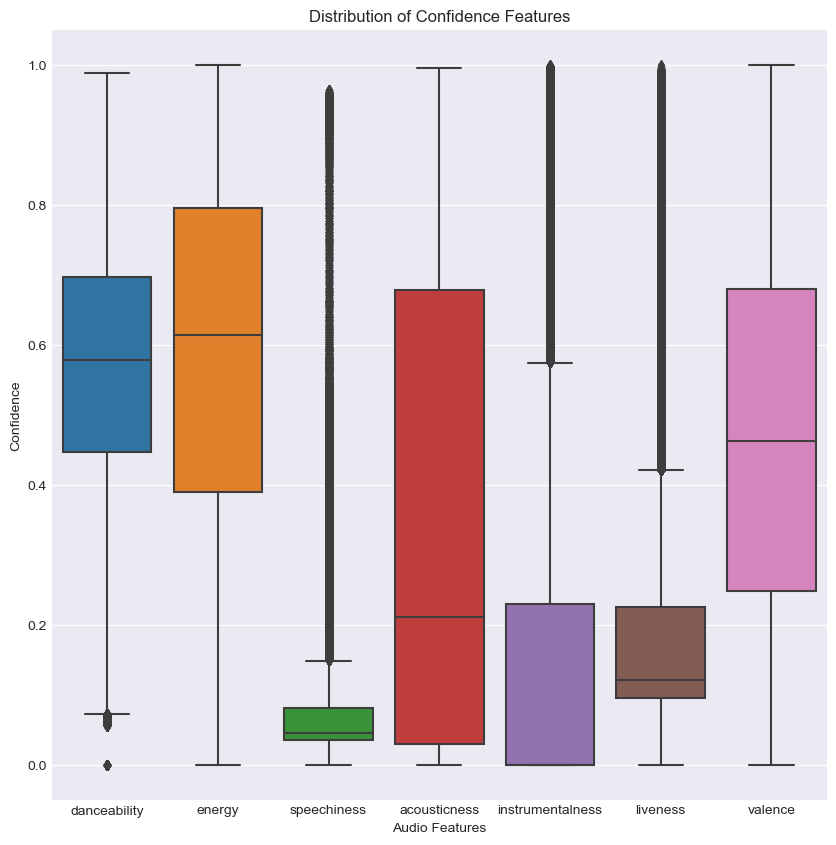

In [30]:
#boxplot of condience features on one graph
fig, ax = plt.subplots(figsize = (10, 10))
sns.boxplot(data = main_dataset[confidence_features], ax = ax)
ax.set_title('Distribution of Confidence Features')
ax.set_xlabel('Audio Features')
ax.set_ylabel('Confidence')

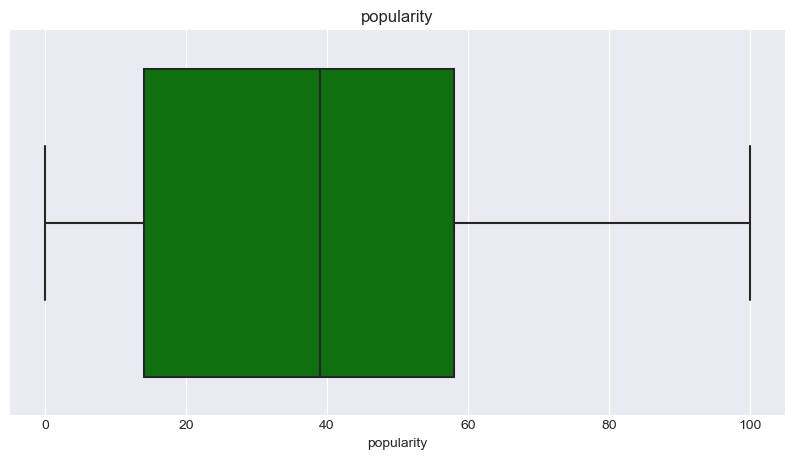

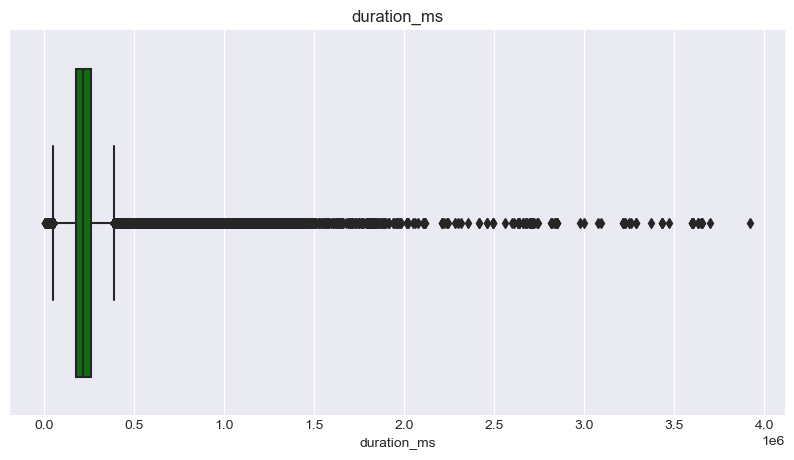

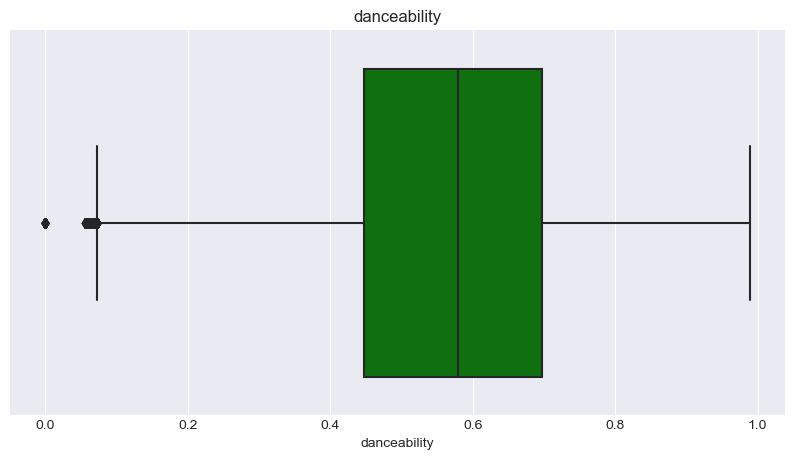

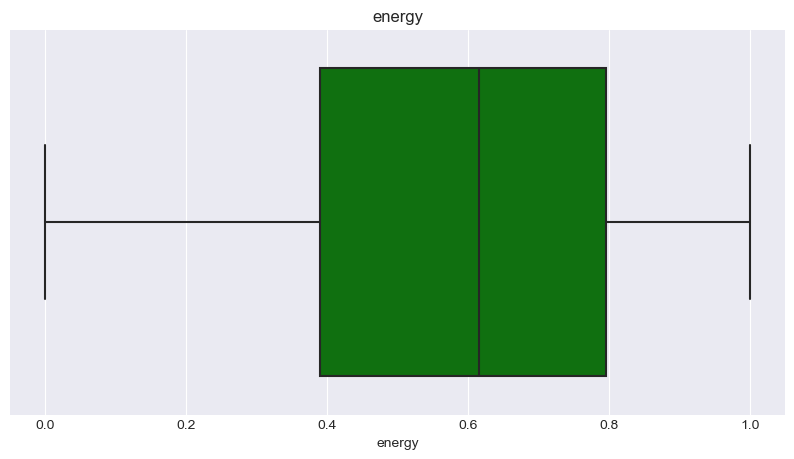

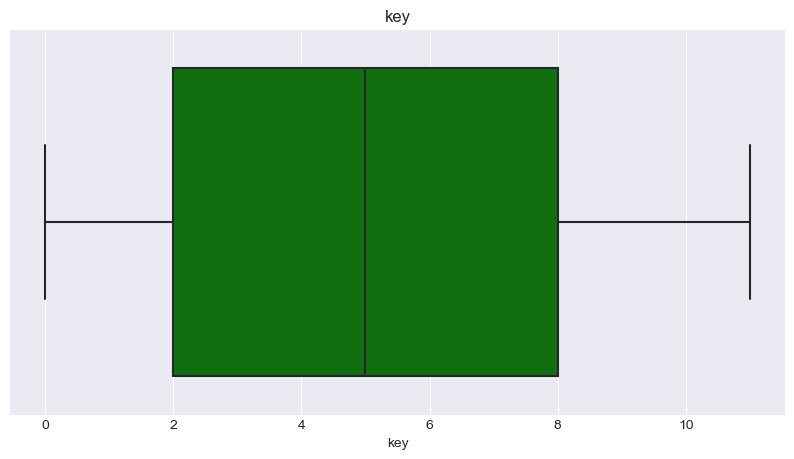

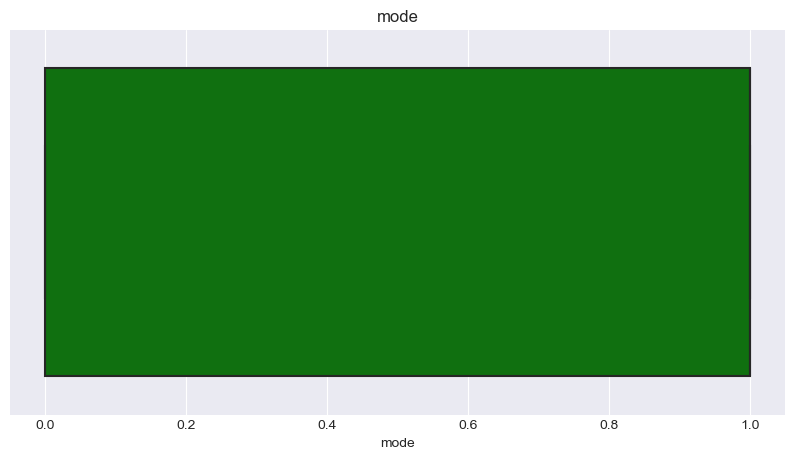

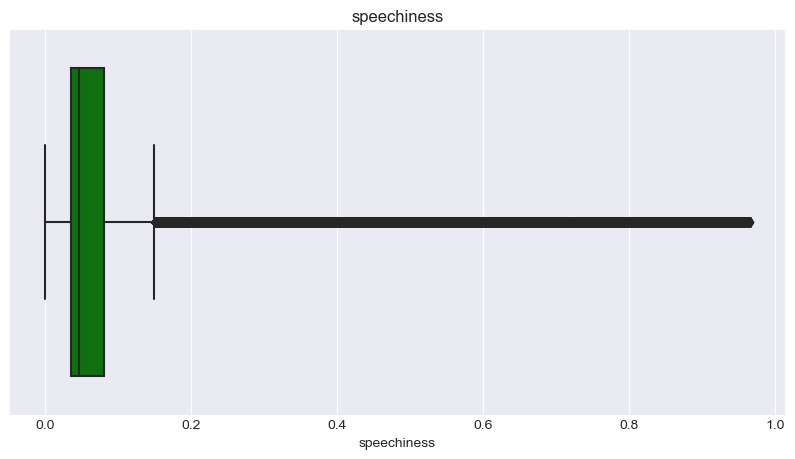

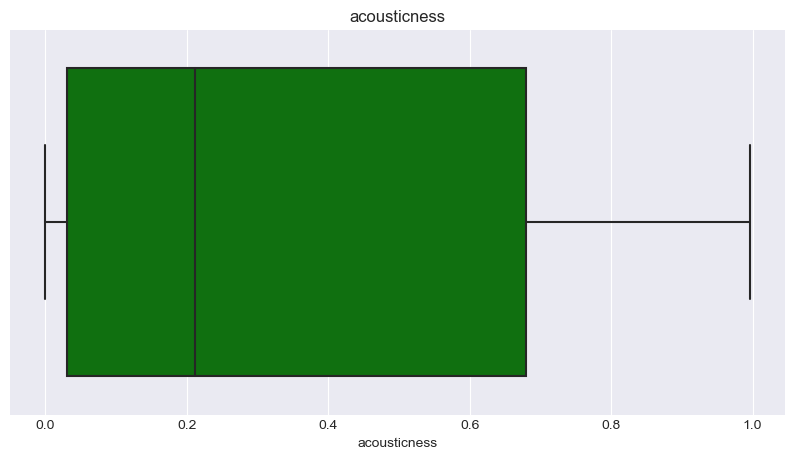

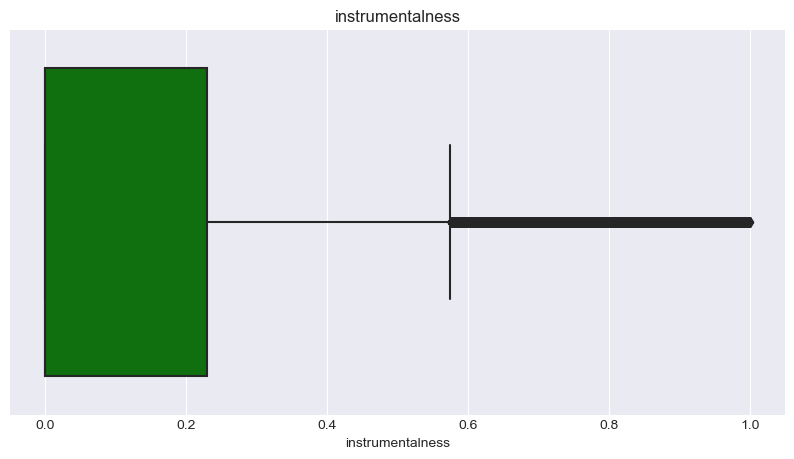

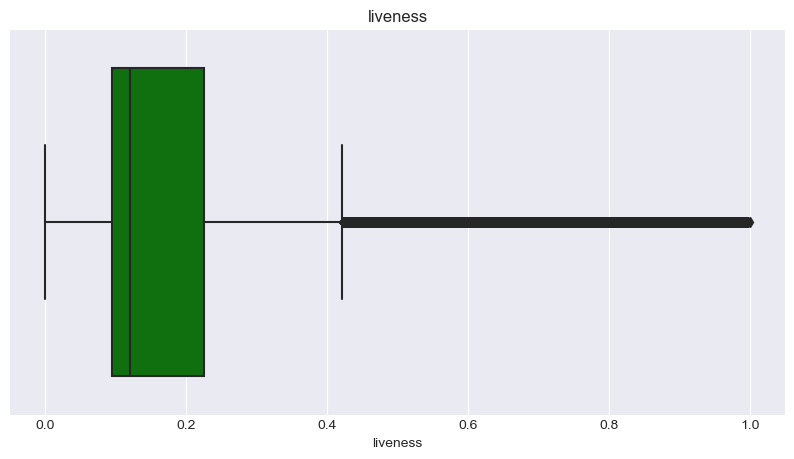

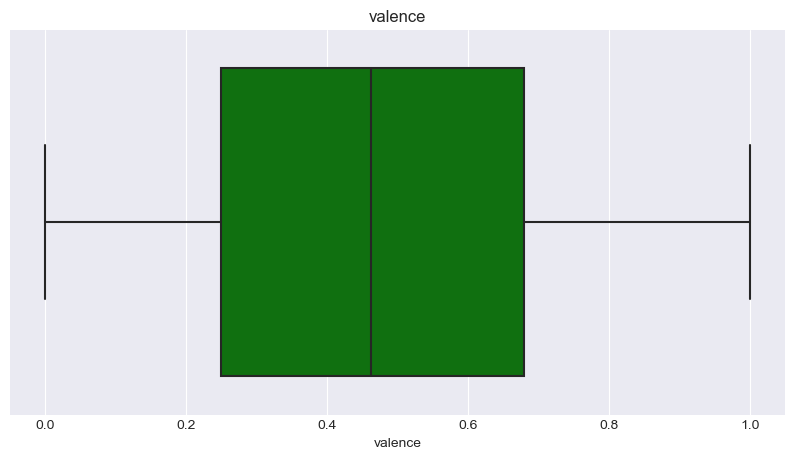

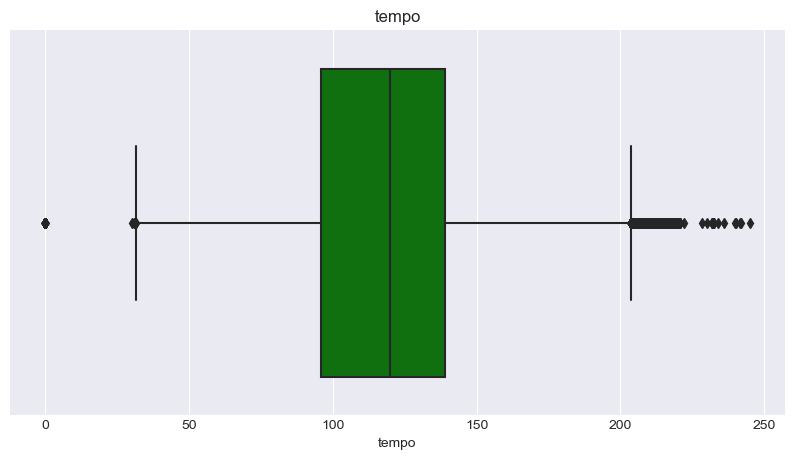

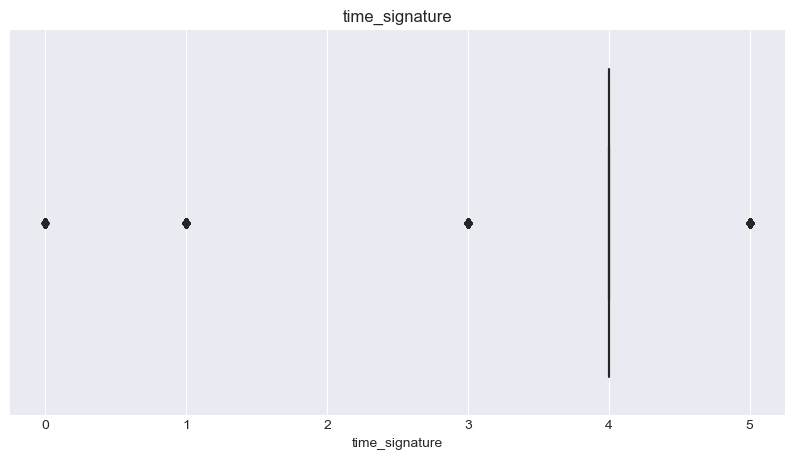

In [31]:
#create a boxplot for each audio feature
for feature in audio_features:
    plt.figure(figsize = (10, 5))
    sns.boxplot(x = main_dataset[feature],color='green')
    plt.title(feature)
    plt.show()

In [32]:
scaler = RobustScaler()
main_dataset_scaled = scaler.fit_transform(main_dataset[audio_features])
audio_scaled_df = pd.DataFrame(main_dataset_scaled, columns = audio_features)
scaled_df = pd.concat([main_dataset[['track_id', 'playlist_id']], audio_scaled_df], axis=1)

In [33]:
scaled_df.describe()

,track_id,playlist_id,popularity,duration_ms,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,459593.000000,459593.000000,459593.000000,459593.000000,459593.000000,459593.000000,459593.000000,459593.000000,459593.000000,459593.000000,459593.000000,459593.000000,459593.000000,459593.000000,459593.000000
mean,157818.352022,3056.740897,-0.043335,0.190918,-0.060852,-0.094708,0.038021,-0.350797,0.851009,0.218324,0.866969,0.498329,0.013676,-0.007346,-0.107904
std,83779.381713,1767.159075,0.577606,1.255453,0.732065,0.656671,0.592621,0.477220,2.322338,0.541467,1.494250,1.202688,0.608809,0.700214,0.437590
min,1.000000,1.000000,-0.886364,-2.455202,-2.316000,-1.514778,-0.833333,-1.000000,-1.017505,-0.327009,-0.000878,-0.926493,-1.074246,-2.788952,-4.000000
25%,87324.000000,1508.000000,-0.568182,-0.449925,-0.524000,-0.554187,-0.500000,-1.000000,-0.245077,-0.279654,-0.000878,-0.196018,-0.496520,-0.557284,0.000000
50%,167402.000000,3121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,232176.000000,4604.000000,0.431818,0.550075,0.476000,0.445813,0.500000,0.000000,0.754923,0.720346,0.999122,0.803982,0.503480,0.442716,0.000000
max,277938.000000,6070.000000,1.386364,43.634913,1.640000,0.948276,1.000000,0.000000,20.098468,1.209317,4.346948,6.730475,1.245940,2.905635,1.000000


In [34]:
main_dataset.describe()

,playlist_id,track_id,popularity,duration_ms,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,459593.000000,459593.000000,459593.000000,4.595930e+05,459593.000000,459593.000000,459593.000000,459593.000000,459593.000000,459593.000000,459593.000000,459593.000000,459593.000000,459593.000000,459593.000000
mean,3056.740897,157818.352022,37.093269,2.313695e+05,0.563787,0.576549,5.228124,0.649203,0.085391,0.353540,0.199605,0.186082,0.468894,119.648024,3.892096
std,1767.159075,83779.381713,25.414663,1.065917e+05,0.183016,0.266608,3.555728,0.477220,0.106131,0.351033,0.343677,0.157071,0.262397,30.119014,0.437590
min,1.000000,1.000000,0.000000,6.706000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1508.000000,87324.000000,14.000000,1.769600e+05,0.448000,0.390000,2.000000,0.000000,0.035300,0.030700,0.000000,0.095400,0.249000,95.993000,4.000000
50%,3121.000000,167402.000000,39.000000,2.151600e+05,0.579000,0.615000,5.000000,1.000000,0.046500,0.212000,0.000202,0.121000,0.463000,119.964000,4.000000
75%,4604.000000,232176.000000,58.000000,2.618630e+05,0.698000,0.796000,8.000000,1.000000,0.081000,0.679000,0.230000,0.226000,0.680000,139.007000,4.000000
max,6070.000000,277938.000000,100.000000,3.919895e+06,0.989000,1.000000,11.000000,1.000000,0.965000,0.996000,1.000000,1.000000,1.000000,244.947000,5.000000


In [57]:
std_devs = main_dataset.groupby('playlist_id')[audio_features].std()
std_devs

,popularity,duration_ms,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
playlist_id,,,,,,,,,,,,,
1,20.660390,35196.759727,0.090456,0.105293,3.691556,0.449776,0.030826,0.050835,0.088305,0.142950,0.180138,16.870353,0.000000
2,18.083498,89841.207974,0.124780,0.218165,3.914681,0.000000,0.010459,0.332056,0.031239,0.121511,0.173986,25.312443,0.444803
3,15.166667,50829.377020,0.136526,0.156297,3.534805,0.502519,0.067087,0.182256,0.163038,0.167843,0.251005,26.314191,0.242878
4,20.315041,43171.470894,0.114359,0.131691,3.550203,0.429235,0.045426,0.201163,0.070182,0.176144,0.223726,23.462988,0.100000
5,25.231575,18383.232068,0.082030,0.127392,4.063829,0.469668,0.095746,0.227910,0.035139,0.090082,0.171150,26.747752,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6066,13.524683,92056.040251,0.153808,0.184976,3.478007,0.504878,0.012925,0.282953,0.064528,0.246488,0.255052,25.354816,0.364321
6067,29.472578,47224.925170,0.149509,0.147659,3.794977,0.499947,0.092082,0.208248,0.295436,0.126971,0.244521,33.096691,0.245301
6068,16.298925,50172.624275,0.100858,0.088826,3.677669,0.502519,0.094993,0.109362,0.292812,0.171443,0.177425,16.069937,0.100000


Data visualization

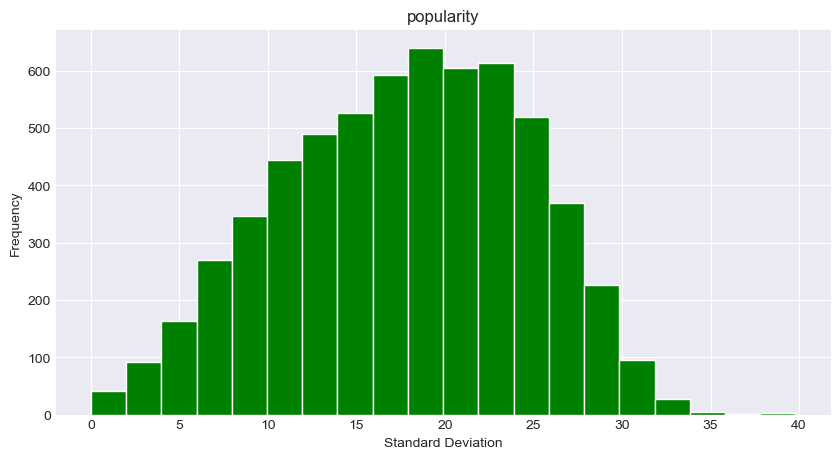

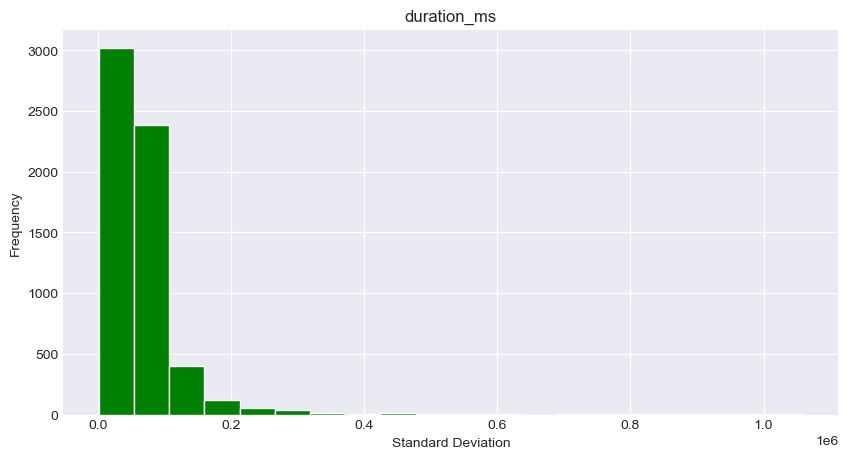

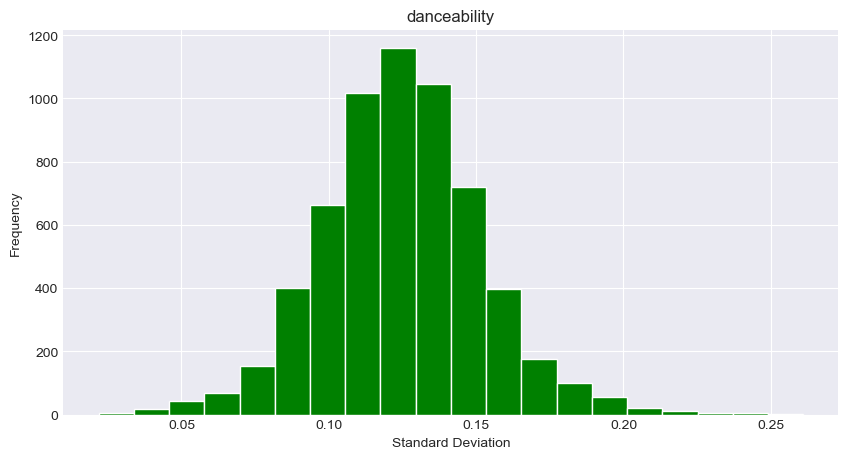

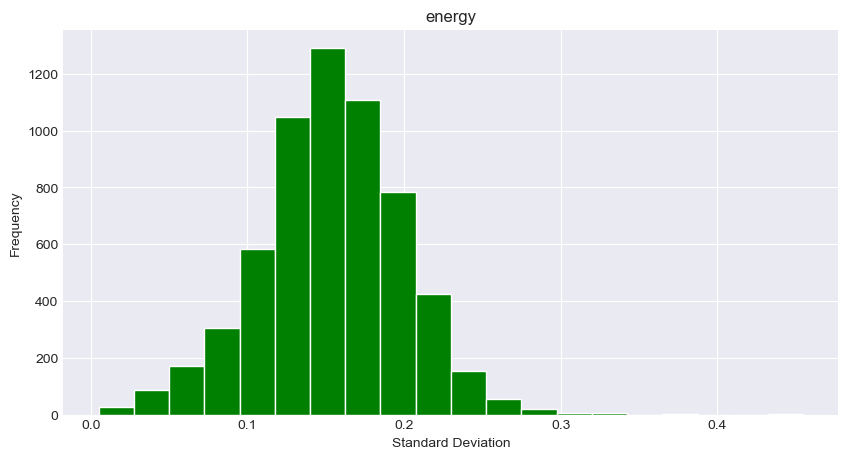

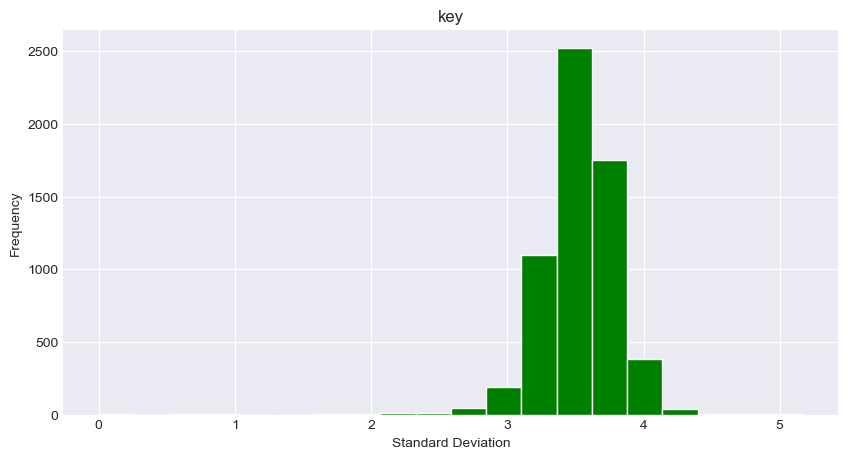

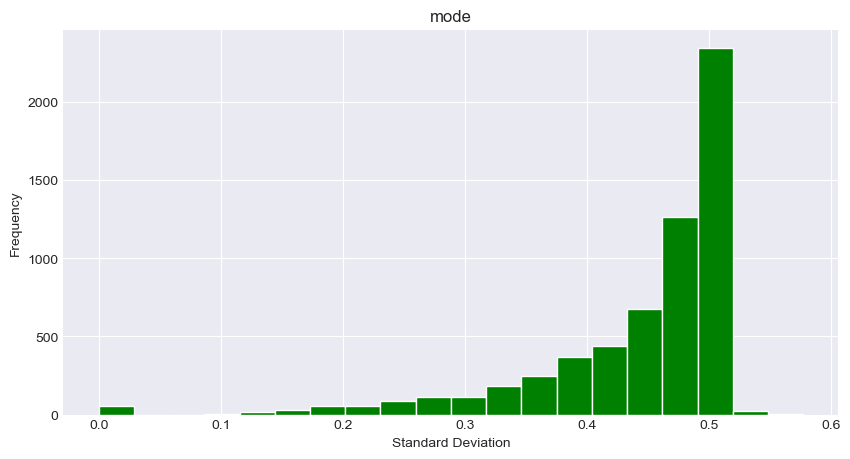

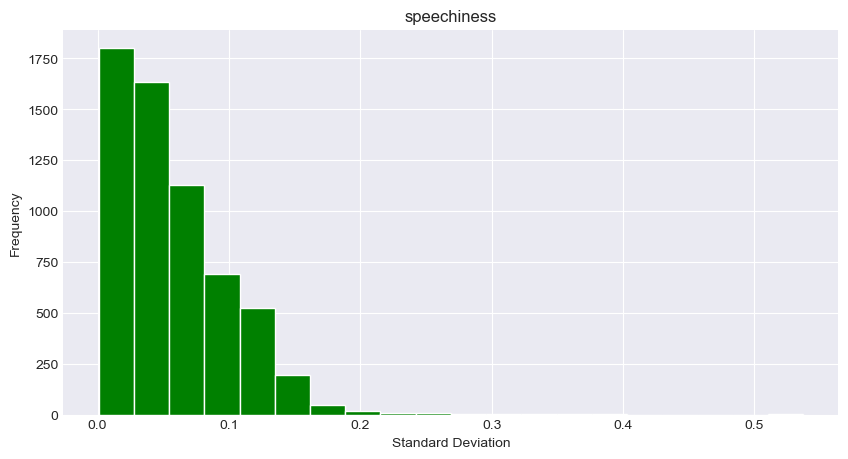

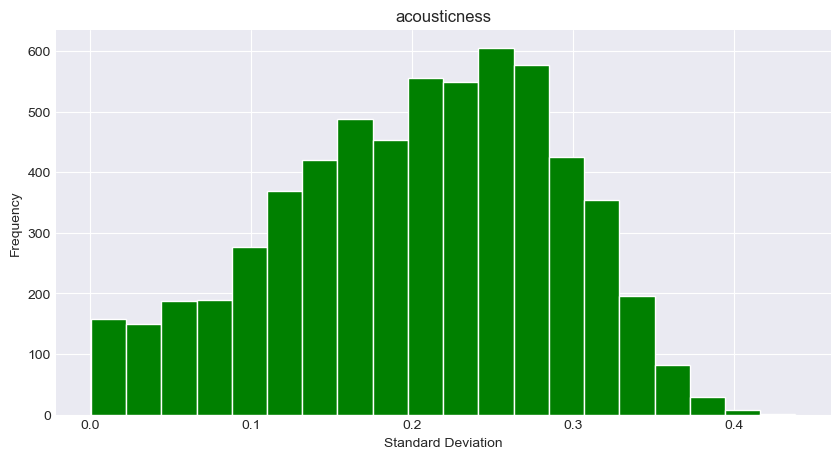

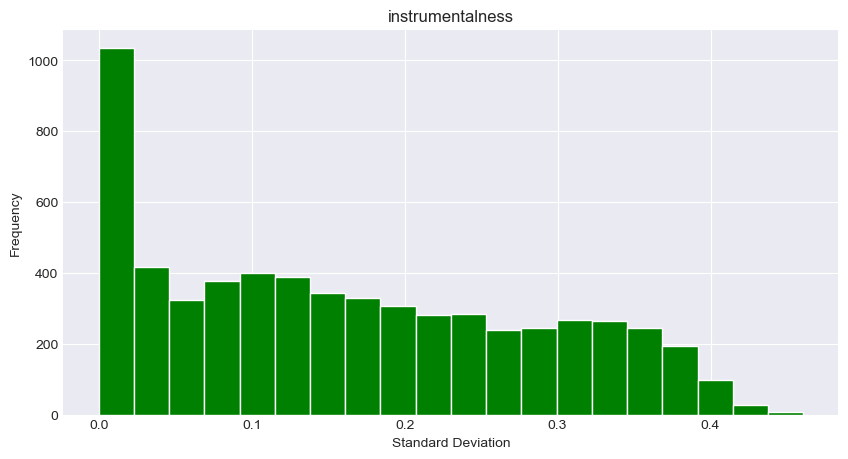

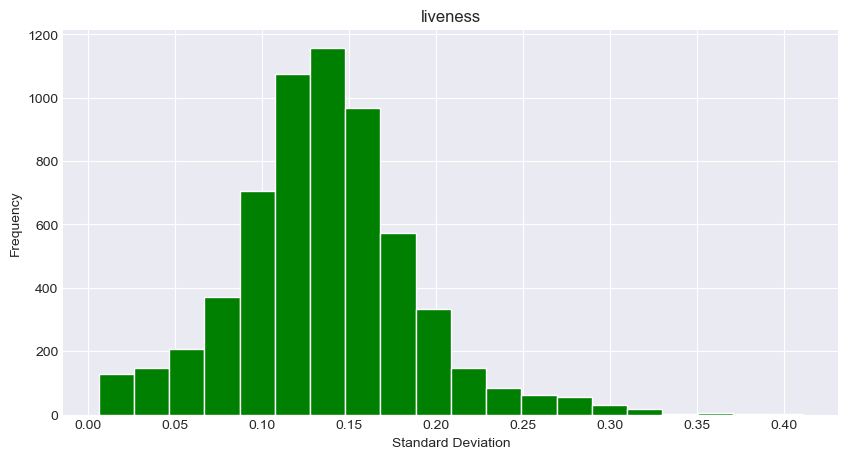

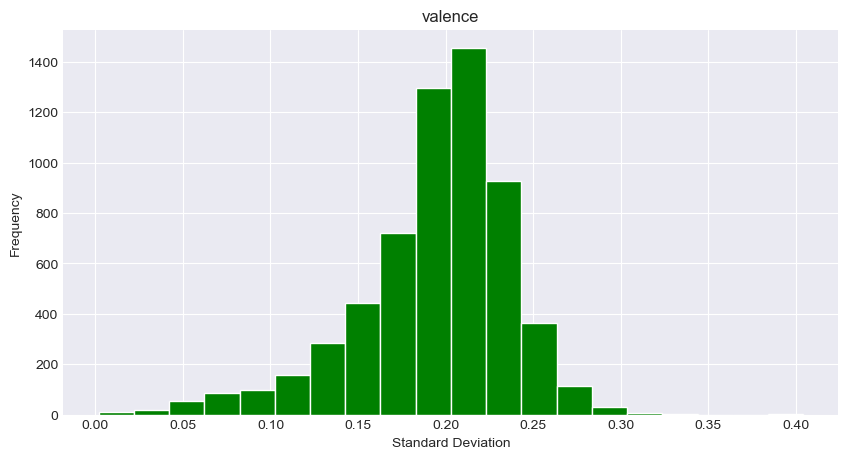

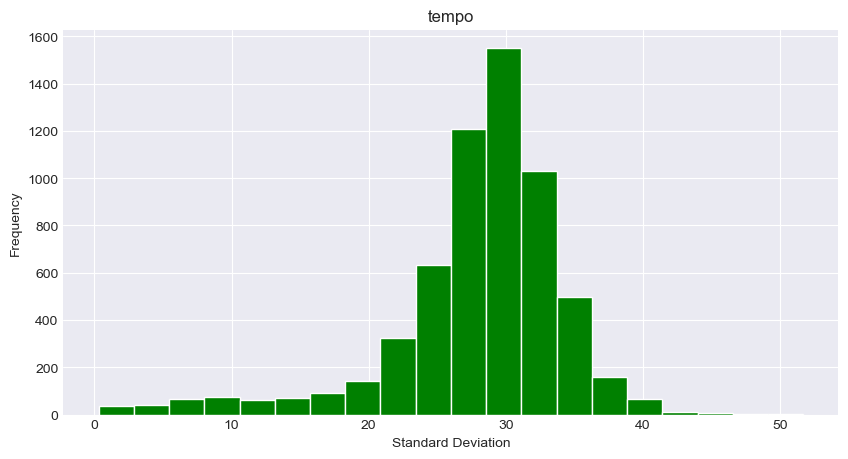

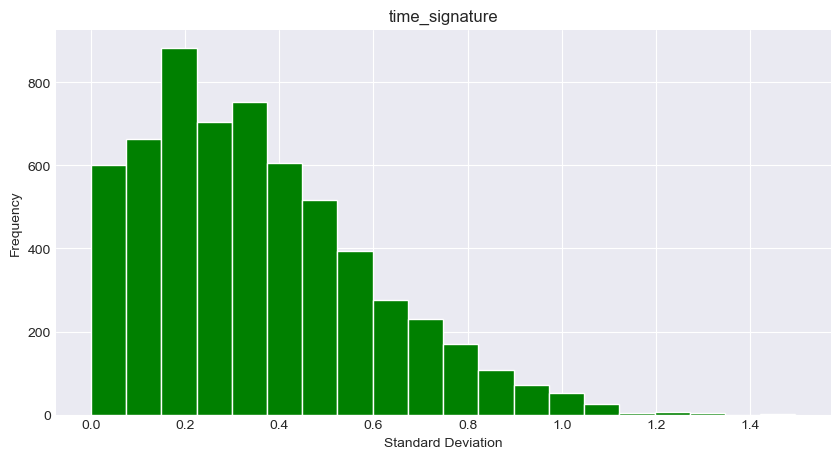

In [36]:
#create a histogram from std dev for each audio feature
#set color of histogram bars to green
for feature in audio_features:
    plt.figure(figsize=(10, 5))
    plt.hist(std_devs[feature], bins = 20, color='green')
    plt.title(feature)
    plt.xlabel('Standard Deviation')
    plt.ylabel('Frequency')
    plt.show()

In [58]:
#find the outlier data for each audio feature within each playlist row. Add it to a dataframe as feature lower bound and feature upper bound
# outliers = []
# for index, row in std_devs.iterrows():
#     for feature in audio_features:
#         outliers.append([index, feature, row[feature], row[feature] + 2*row[feature], row[feature] - 2*row[feature]])
# outliers = pd.DataFrame(outliers, columns = ['playlist_id', 'feature', 'mean', 'upper_bound', 'lower_bound'])
# outliers


,playlist_id,feature,mean,upper_bound,lower_bound
0,1,popularity,20.660390,61.981171,-20.660390
1,1,duration_ms,35196.759727,105590.279181,-35196.759727
2,1,danceability,0.090456,0.271367,-0.090456
3,1,energy,0.105293,0.315878,-0.105293
4,1,key,3.691556,11.074668,-3.691556
...,...,...,...,...,...
78905,6070,instrumentalness,0.369581,1.108744,-0.369581
78906,6070,liveness,0.104698,0.314093,-0.104698
78907,6070,valence,0.181460,0.544379,-0.181460
78908,6070,tempo,33.025713,99.077138,-33.025713


In [64]:
std_devs = std_devs.reset_index()
std_devs

,playlist_id,popularity,duration_ms,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,1,20.660390,35196.759727,0.090456,0.105293,3.691556,0.449776,0.030826,0.050835,0.088305,0.142950,0.180138,16.870353,0.000000
1,2,18.083498,89841.207974,0.124780,0.218165,3.914681,0.000000,0.010459,0.332056,0.031239,0.121511,0.173986,25.312443,0.444803
2,3,15.166667,50829.377020,0.136526,0.156297,3.534805,0.502519,0.067087,0.182256,0.163038,0.167843,0.251005,26.314191,0.242878
3,4,20.315041,43171.470894,0.114359,0.131691,3.550203,0.429235,0.045426,0.201163,0.070182,0.176144,0.223726,23.462988,0.100000
4,5,25.231575,18383.232068,0.082030,0.127392,4.063829,0.469668,0.095746,0.227910,0.035139,0.090082,0.171150,26.747752,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6065,6066,13.524683,92056.040251,0.153808,0.184976,3.478007,0.504878,0.012925,0.282953,0.064528,0.246488,0.255052,25.354816,0.364321
6066,6067,29.472578,47224.925170,0.149509,0.147659,3.794977,0.499947,0.092082,0.208248,0.295436,0.126971,0.244521,33.096691,0.245301
6067,6068,16.298925,50172.624275,0.100858,0.088826,3.677669,0.502519,0.094993,0.109362,0.292812,0.171443,0.177425,16.069937,0.100000
6068,6069,24.902174,66351.538766,0.167089,0.248169,3.671828,0.472582,0.085283,0.349595,0.174234,0.119605,0.224887,29.833426,0.557411


In [65]:
outlier_tracks = []
for index, row in std_devs.iterrows():
    for index, outlier_row in outliers.iterrows():
        if row['playlist_id'] == outlier_row['playlist_id'] and (row[outlier_row['feature']] > outlier_row['upper_bound'] or row[outlier_row['feature']] < outlier_row['lower_bound']):
            outlier_tracks.append([index, outlier_row['feature'], row[outlier_row['feature']]])
outlier_tracks = pd.DataFrame(outlier_tracks, columns = ['playlist_id', 'feature', 'value'])
outlier_tracks

KeyboardInterrupt: 

<Axes: >

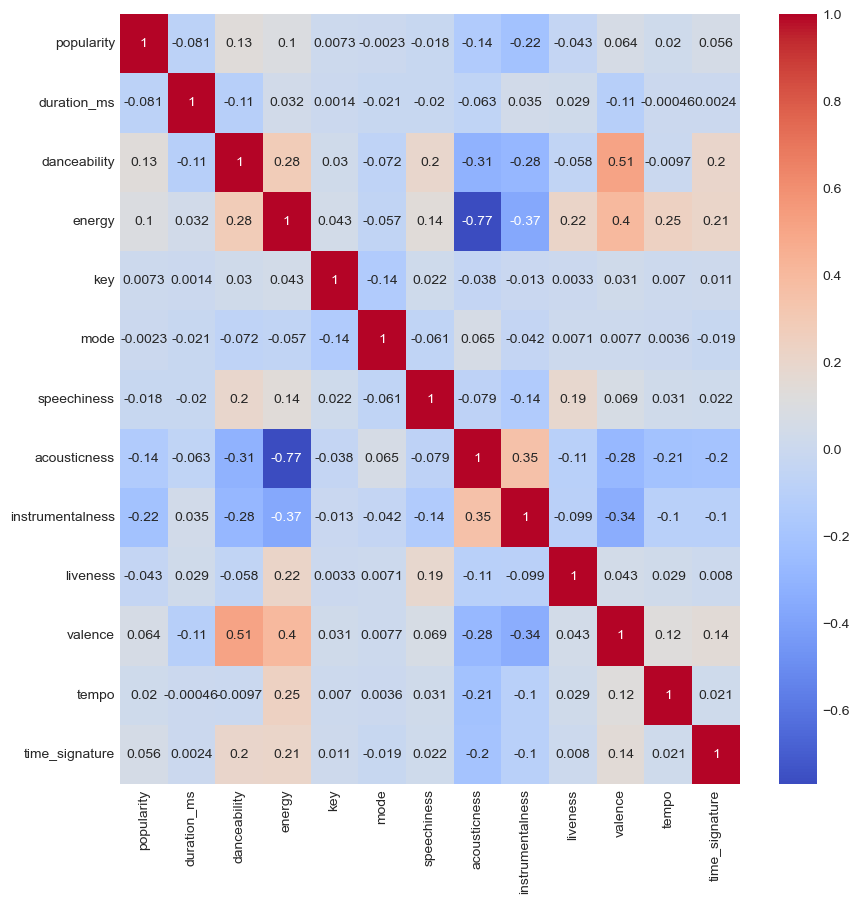

In [39]:
#create a heatmap of the std_devs across audio features
plt.figure(figsize = (10, 10))
sns.heatmap(main_dataset[audio_features].corr(), annot = True, cmap = 'coolwarm')


In [40]:
#for each playlist, find the audio feature with the lowest and highest std_devs. Create a histogram of thes count of playlists for each audio feature
lowest_std_dev = []
for index, row in std_devs.iterrows():
    lowest_std_dev.append([index, row.idxmin(), row.min()])
lowest_std_dev = pd.DataFrame(lowest_std_dev, columns = ['playlist_id', 'feature', 'std_dev'])
lowest_std_dev

,playlist_id,feature,std_dev
0,1,time_signature,0.000000
1,2,mode,0.000000
2,3,speechiness,0.067087
3,4,speechiness,0.045426
4,5,time_signature,0.000000
...,...,...,...
6065,6066,speechiness,0.012925
6066,6067,speechiness,0.092082
6067,6068,energy,0.088826
6068,6069,speechiness,0.085283


Text(0, 0.5, 'Count of Playlists')

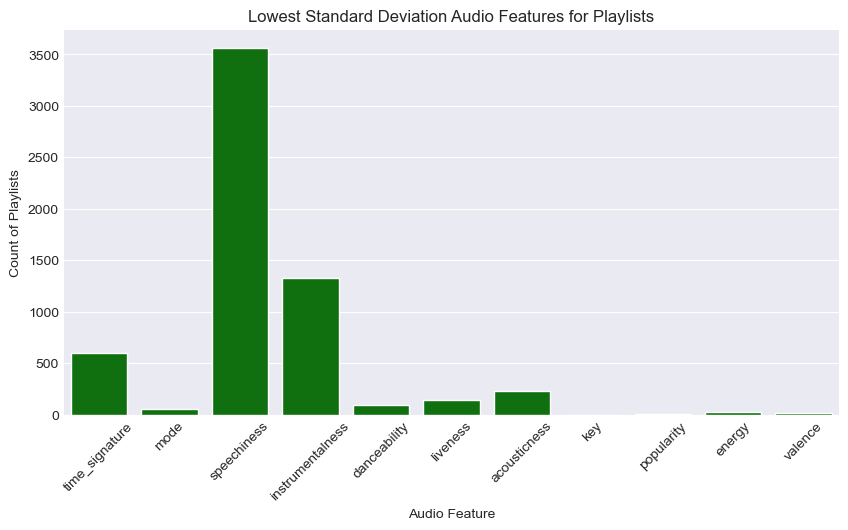

In [42]:
#create a bar chart of the count of playlists for each audio feature
plt.figure(figsize = (10, 5))
sns.countplot(x = lowest_std_dev['feature'], color = 'green')
plt.xticks(rotation = 45)
plt.title('Lowest Standard Deviation Audio Features for Playlists')
plt.xlabel('Audio Feature')
plt.ylabel('Count of Playlists')

Text(0, 0.5, 'Standard Deviation')

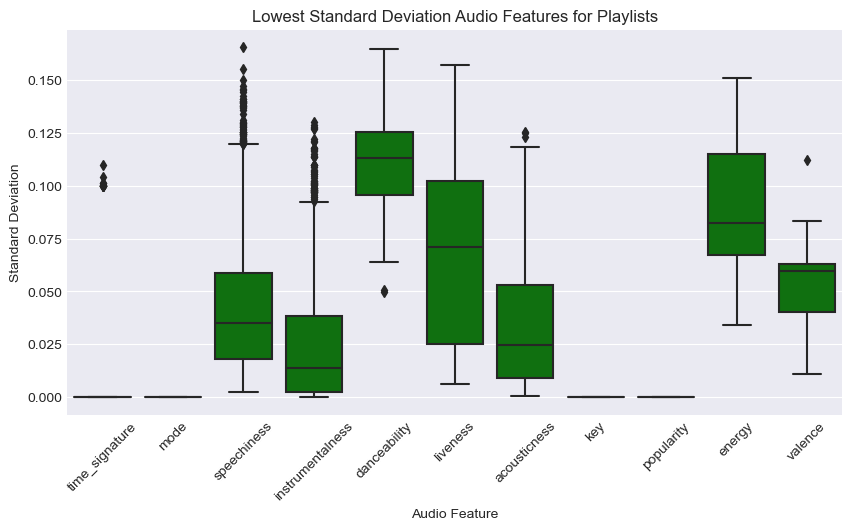

In [45]:
#create a box and whisker plot with the std_dev distribution for each feature
plt.figure(figsize = (10, 5))
sns.boxplot(x = lowest_std_dev['feature'], y = lowest_std_dev['std_dev'], color = 'green')
plt.xticks(rotation = 45)
plt.title('Lowest Standard Deviation Audio Features for Playlists')
plt.xlabel('Audio Feature')
plt.ylabel('Standard Deviation')
